# Importing Data

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plot
data = pd.read_csv("Quality of Service 5G.csv")
data

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
0,9/3/2023 10:00,User_1,Video_Call,-75 dBm,30 ms,10 Mbps,15 Mbps,70%
1,9/3/2023 10:00,User_2,Voice_Call,-80 dBm,20 ms,100 Kbps,120 Kbps,80%
2,9/3/2023 10:00,User_3,Streaming,-85 dBm,40 ms,5 Mbps,6 Mbps,75%
3,9/3/2023 10:00,User_4,Emergency_Service,-70 dBm,10 ms,1 Mbps,1.5 Mbps,90%
4,9/3/2023 10:00,User_5,Online_Gaming,-78 dBm,25 ms,2 Mbps,3 Mbps,85%
...,...,...,...,...,...,...,...,...
395,9/3/2023 10:06,User_396,Streaming,-110 dBm,61 ms,1.3 Mbps,1.8 Mbps,85%
396,9/3/2023 10:06,User_397,Video_Call,-40 dBm,53 ms,14.5 Mbps,15.8 Mbps,75%
397,9/3/2023 10:06,User_398,Video_Streaming,-113 dBm,58 ms,1.0 Mbps,1.4 Mbps,70%
398,9/3/2023 10:06,User_399,Emergency_Service,-40 dBm,5 ms,0.4 Mbps,0.4 Mbps,70%


# Data Pre-Processing

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Timestamp            400 non-null    object
 1   User_ID              400 non-null    object
 2   Application_Type     400 non-null    object
 3   Signal_Strength      400 non-null    object
 4   Latency              400 non-null    object
 5   Required_Bandwidth   400 non-null    object
 6   Allocated_Bandwidth  400 non-null    object
 7   Resource_Allocation  400 non-null    object
dtypes: object(8)
memory usage: 25.1+ KB


In [29]:
data.isnull().any()

Timestamp              False
User_ID                False
Application_Type       False
Signal_Strength        False
Latency                False
Required_Bandwidth     False
Allocated_Bandwidth    False
Resource_Allocation    False
dtype: bool

In [30]:
data.describe()

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
count,400,400,400,400,400,400,400,400
unique,7,400,11,84,87,188,194,9
top,9/3/2023 10:01,User_1,Video_Call,-97 dBm,5 ms,0.1 Mbps,0.1 Mbps,70%
freq,60,1,58,9,35,16,16,148


In [31]:
data['Application_Type'].unique()

array(['Video_Call', 'Voice_Call', 'Streaming', 'Emergency_Service',
       'Online_Gaming', 'Background_Download', 'Web_Browsing',
       'IoT_Temperature', 'Video_Streaming', 'File_Download', 'VoIP_Call'],
      dtype=object)

In [32]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
data['Application_Type'] = encoder.fit_transform(np.array(data['Application_Type']).reshape(-1,1))

In [33]:
import pickle 
pickle.dump(encoder,open("encoder 5g","wb"))

In [34]:
data['Application_Type'].unique()

array([ 6.,  9.,  5.,  1.,  4.,  0., 10.,  3.,  7.,  2.,  8.])

In [35]:
data['Resource_Allocation'] = data['Resource_Allocation'].str.replace('%','').astype('int')

In [36]:
data['User_ID'] = data['User_ID'].str.replace('User_','').astype('int')

In [37]:
def Mbps_to_Kbps(value):
    if 'Mbps' in value:
        n = float(value.replace(' Mbps',''))
        return str(n*1000)+ ' Kbps'
    else:
        return value

In [38]:
data['Required_Bandwidth'] = data['Required_Bandwidth'].map(Mbps_to_Kbps)
data['Allocated_Bandwidth'] = data['Allocated_Bandwidth'].map(Mbps_to_Kbps)

In [39]:
data['Required_Bandwidth'] = data['Required_Bandwidth'].str.replace('Kbps','').astype('float')
data['Allocated_Bandwidth'] = data['Allocated_Bandwidth'].str.replace('Kbps','').astype('float')

In [40]:
data['Latency'] = data['Latency'].str.replace('ms','').astype('int')
data['Signal_Strength'] = data['Signal_Strength'].str.replace('dBm','').astype('int')

In [41]:
data['Timestamp']= pd.to_datetime(data['Timestamp'])

In [42]:
data

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
0,2023-09-03 10:00:00,1,6.0,-75,30,10000.0,15000.0,70
1,2023-09-03 10:00:00,2,9.0,-80,20,100.0,120.0,80
2,2023-09-03 10:00:00,3,5.0,-85,40,5000.0,6000.0,75
3,2023-09-03 10:00:00,4,1.0,-70,10,1000.0,1500.0,90
4,2023-09-03 10:00:00,5,4.0,-78,25,2000.0,3000.0,85
...,...,...,...,...,...,...,...,...
395,2023-09-03 10:06:00,396,5.0,-110,61,1300.0,1800.0,85
396,2023-09-03 10:06:00,397,6.0,-40,53,14500.0,15800.0,75
397,2023-09-03 10:06:00,398,7.0,-113,58,1000.0,1400.0,70
398,2023-09-03 10:06:00,399,1.0,-40,5,400.0,400.0,70


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Timestamp            400 non-null    datetime64[ns]
 1   User_ID              400 non-null    int32         
 2   Application_Type     400 non-null    float64       
 3   Signal_Strength      400 non-null    int32         
 4   Latency              400 non-null    int32         
 5   Required_Bandwidth   400 non-null    float64       
 6   Allocated_Bandwidth  400 non-null    float64       
 7   Resource_Allocation  400 non-null    int32         
dtypes: datetime64[ns](1), float64(3), int32(4)
memory usage: 18.9 KB


In [44]:
data.describe()

,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000
mean,200.500000,5.092500,-80.495000,33.825000,3135.512500,3502.38000,74.712500
std,115.614301,3.128644,20.701119,21.122139,3984.096715,4460.80117,8.982291
min,1.000000,0.000000,-123.000000,0.000000,0.000000,0.00000,50.000000
25%,100.750000,3.000000,-98.000000,21.750000,417.500000,417.50000,70.000000
50%,200.500000,5.500000,-83.000000,31.000000,1200.000000,1350.00000,70.000000
75%,300.250000,7.000000,-64.000000,45.000000,4100.000000,4425.00000,80.000000
max,400.000000,10.000000,-40.000000,110.000000,14500.000000,15800.00000,90.000000


# Data Visualization 

<Axes: xlabel='Application_Type', ylabel='count'>

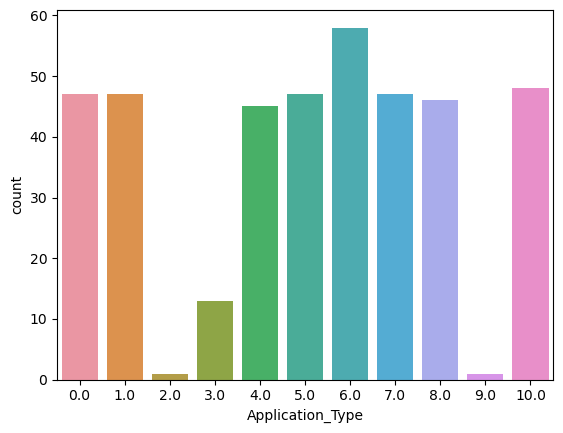

In [45]:
sns.countplot(x=data['Application_Type'])

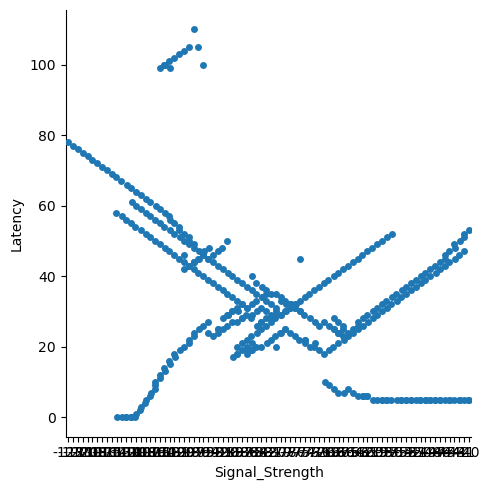

In [46]:
sns.catplot(x = 'Signal_Strength', y = 'Latency', data = data)

# Treating Outliners

In [47]:
q1 = np.percentile(data['Latency'], 25,method = 'midpoint')
q3 = np.percentile(data['Latency'],75,method = 'midpoint')
IQR = q3-q1
upper = q3+1.5*IQR
lower = q1-1.5*IQR
upper_value = np.where(data['Latency']>= upper)
lower_value = np.where(data['Latency']<= lower)
data.drop(upper_value[0],inplace = True)
data.drop(lower_value[0],inplace = True)

<Axes: >

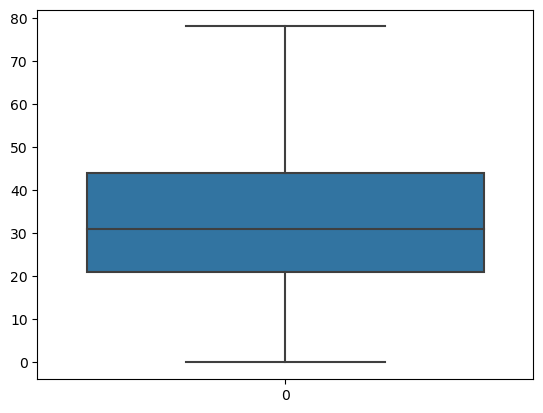

In [48]:
sns.boxplot(data = data['Latency'])

In [49]:
data['Required_Bandwidth']=np.sqrt(data['Required_Bandwidth'])

<Axes: >

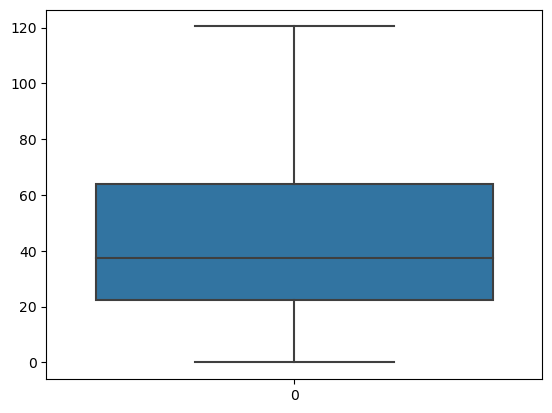

In [50]:
sns.boxplot(data = data['Required_Bandwidth'])

In [51]:
data['Allocated_Bandwidth']=np.sqrt(data['Allocated_Bandwidth'])

<Axes: >

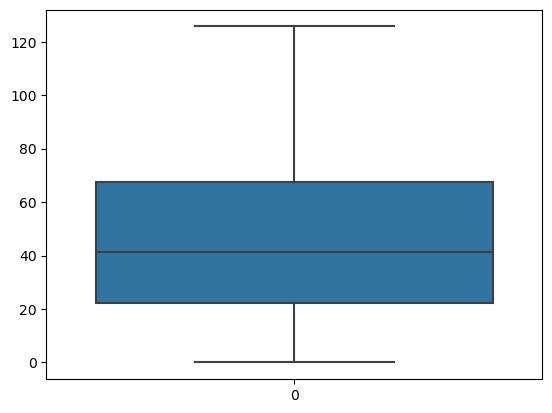

In [52]:
sns.boxplot(data = data['Allocated_Bandwidth'])

<Axes: >

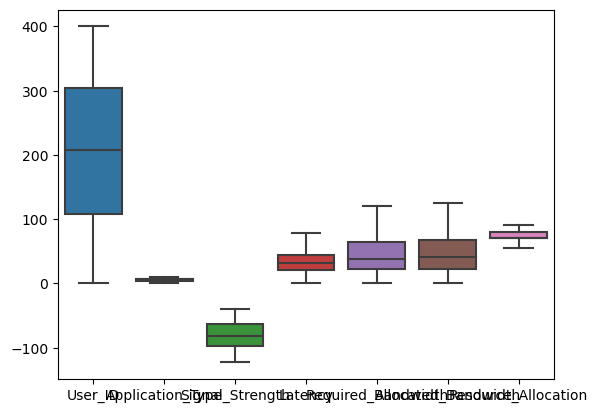

In [53]:
sns.boxplot(data = data)

In [54]:
df = data

In [55]:
def min_max_scaling(column):
    min_val = column.min()
    max_val = column.max()
    return (column - min_val) / (max_val - min_val)

In [56]:
Transformed_df = df

Transformed_df['Signal_Strength'] = min_max_scaling(df['Signal_Strength'])
Transformed_df['Latency'] = min_max_scaling(df['Latency'])
Transformed_df['Required_Bandwidth'] = min_max_scaling(df['Required_Bandwidth'])
Transformed_df['Allocated_Bandwidth'] = min_max_scaling(df['Allocated_Bandwidth'])
Transformed_df['Resource_Allocation'] = min_max_scaling(df['Resource_Allocation'])
Transformed_df['Application_Type'] = min_max_scaling(df['Application_Type'])

Transformed_df.drop('Timestamp', axis=1, inplace=True)

In [57]:
df.drop('User_ID', axis = 1, inplace = True)

In [58]:
data = Transformed_df

In [59]:
data

,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
0,0.6,0.578313,0.384615,0.830455,0.974355,0.428571
1,0.9,0.518072,0.256410,0.083045,0.087149,0.714286
2,0.5,0.457831,0.512821,0.587220,0.616236,0.571429
3,0.1,0.638554,0.128205,0.262613,0.308118,1.000000
4,0.4,0.542169,0.320513,0.371391,0.435745,0.857143
...,...,...,...,...,...,...
395,0.5,0.156627,0.782051,0.299425,0.337526,0.857143
396,0.6,1.000000,0.679487,1.000000,1.000000,0.571429
397,0.7,0.120482,0.743590,0.262613,0.297670,0.428571
398,0.1,1.000000,0.064103,0.166091,0.159111,0.428571


# spliting Data

In [60]:
x = data.drop('Resource_Allocation',axis = 1)
y = data['Resource_Allocation']

In [61]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = .20 , random_state = 42)

In [62]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((309, 5), (78, 5), (309,), (78,))

# Linear Regression

In [63]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
ll = lr.fit(xtrain,ytrain)

In [64]:
ypred = lr.predict(xtest)
ypred

array([0.46431963, 0.54557824, 0.66266106, 0.50687479, 0.56175274,
       0.47850468, 0.51264746, 0.5494439 , 0.98015711, 0.44523767,
       0.50324346, 0.64215111, 0.85288799, 0.43994748, 0.59902687,
       0.66002201, 0.56981037, 0.4449926 , 0.65279977, 0.56981037,
       0.55884612, 0.50001031, 0.53374967, 0.70062959, 0.21948588,
       0.40970985, 0.56179201, 0.22196151, 0.57259853, 1.69107432,
       0.42299616, 0.66848584, 0.26193822, 0.56965131, 0.4925175 ,
       1.2614217 , 0.66882776, 0.20272638, 0.71809035, 0.16453166,
       0.66829933, 0.51428501, 0.61506358, 1.02825865, 0.59927239,
       0.20709956, 0.43101452, 0.51033361, 0.78987202, 0.77850776,
       0.55603702, 0.68459208, 0.57741718, 0.5097848 , 0.6745158 ,
       0.64640574, 0.50778455, 0.18251177, 0.54986356, 0.93947958,
       0.61925085, 0.75469588, 0.24566128, 0.76206098, 0.37592547,
       0.5617903 , 0.66574441, 0.68065535, 0.58785664, 1.19418349,
       0.58785664, 0.51264746, 0.81033334, 0.74011803, 0.55461

In [65]:
from sklearn.metrics import r2_score
acc = r2_score(ytest,ypred)
acc

0.2632118221904969

# DecisionTree

In [66]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state = 42)
tree = dt.fit(xtrain,ytrain)

In [67]:
ypre = dt.predict(xtest)

In [68]:
ac = r2_score(ytest,ypre)
ac

0.7919904363419007

# RandomForest

In [69]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rff = rf.fit(xtrain,ytrain)

In [70]:
ypr = rf.predict(xtest)
ypr

array([0.42857143, 0.43      , 0.99428571, 0.42857143, 0.42857143,
       0.42857143, 0.42857143, 0.42857143, 1.        , 0.42857143,
       0.71571429, 0.88285714, 1.        , 0.42857143, 0.42857143,
       0.57142857, 0.42857143, 0.43      , 0.57142857, 0.42857143,
       0.41657143, 0.71428571, 0.71571429, 0.47857143, 0.14285714,
       0.43238095, 0.42857143, 0.14285714, 0.71428571, 0.43142857,
       0.42857143, 0.57142857, 0.11285714, 0.42857143, 0.71428571,
       1.        , 1.        , 0.14285714, 0.57142857, 0.14285714,
       1.        , 0.64857143, 0.42857143, 1.        , 0.95285714,
       0.14285714, 0.42857143, 0.72428571, 0.45571429, 0.60571429,
       0.85714286, 0.42857143, 0.57142857, 0.42857143, 0.96142857,
       0.84857143, 0.42857143, 0.14285714, 0.71571429, 1.        ,
       0.85714286, 0.57142857, 0.14285714, 0.92142857, 0.05571429,
       0.48      , 1.        , 0.84428571, 0.83571429, 1.        ,
       0.83571429, 0.42857143, 0.44      , 0.53      , 0.45   

In [71]:
accc= r2_score(ytest,ypr)
accc

0.8809794365411436

In [72]:
import pickle 
pickle.dump(rf,open('5G quality.pkl','wb'))